In [2]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.decomposition import PCA
# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
df=pd.read_csv('shopping_trends.csv')
df

,Customer ID,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Previous Purchases,Frequency of Purchases
0,1,55,Male,53,3.1,Yes,14,Fortnightly
1,2,19,Male,64,3.1,Yes,2,Fortnightly
2,3,50,Male,73,3.1,Yes,23,Weekly
3,4,21,Male,90,3.5,Yes,49,Weekly
4,5,45,Male,49,2.7,Yes,31,Annually
...,...,...,...,...,...,...,...,...
3895,3896,40,Female,28,4.2,No,32,Weekly
3896,3897,52,Female,49,4.5,No,41,Bi-Weekly
3897,3898,46,Female,33,2.9,No,24,Quarterly
3898,3899,44,Female,77,3.8,No,24,Weekly


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Subscription Status']=le.fit_transform(df['Subscription Status'])
df['Frequency of Purchases']=le.fit_transform(df['Frequency of Purchases'])
df.head()

,Customer ID,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Previous Purchases,Frequency of Purchases
0,1,55,1,53,3.1,1,14,3
1,2,19,1,64,3.1,1,2,3
2,3,50,1,73,3.1,1,23,6
3,4,21,1,90,3.5,1,49,6
4,5,45,1,49,2.7,1,31,0


In [5]:
data=df[['Customer ID','Purchase Amount (USD)','Previous Purchases','Frequency of Purchases']]
data

,Customer ID,Purchase Amount (USD),Previous Purchases,Frequency of Purchases
0,1,53,14,3
1,2,64,2,3
2,3,73,23,6
3,4,90,49,6
4,5,49,31,0
...,...,...,...,...
3895,3896,28,32,6
3896,3897,49,41,1
3897,3898,33,24,5
3898,3899,77,24,6


In [6]:
data.dtypes

Customer ID               int64
Purchase Amount (USD)     int64
Previous Purchases        int64
Frequency of Purchases    int32
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Customer ID             3900 non-null   int64
 1   Purchase Amount (USD)   3900 non-null   int64
 2   Previous Purchases      3900 non-null   int64
 3   Frequency of Purchases  3900 non-null   int32
dtypes: int32(1), int64(3)
memory usage: 106.8 KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0
Frequency of Purchases,3900.0,2.974872,1.998559,0.0,1.00,3.0,5.00,6.0


<Axes: xlabel='Frequency of Purchases', ylabel='count'>

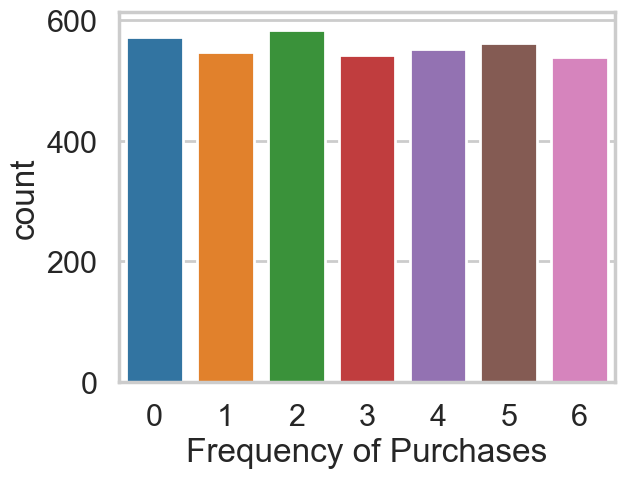

In [14]:
sns.countplot(data =data, x='Frequency of Purchases')

In [9]:
clust=KMeans(n_clusters=3)
clust.fit(data)

C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [10]:
clust.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [11]:
clust.inertia_

552308591.9882296

In [12]:
clust.n_clusters

3

C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

Text(0, 0.5, 'Error')

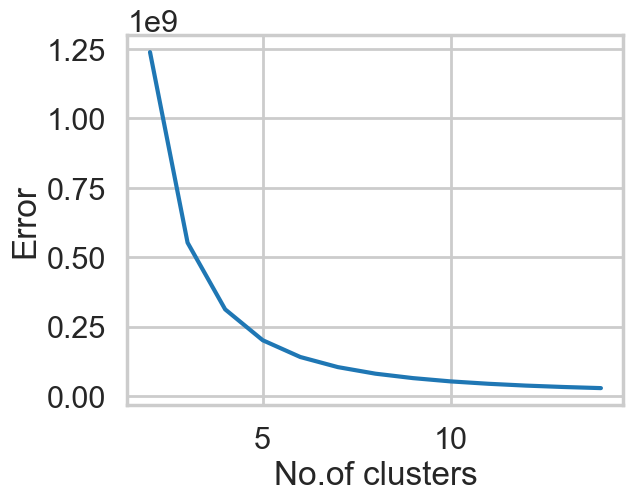

In [19]:
k=list(range(2,15))
y=[]
for i in k:
    km=KMeans(n_clusters=i,random_state=1)
    km.fit(data)
    labels=km.labels_
    y.append(km.inertia_)
plt.plot(k,y)
plt.xlabel('No.of clusters')
plt.ylabel('Error')

C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Uday\AppData\Local\Temp\ipykernel_20796\473821046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster']=cluster.fit_predict(data)


Text(0, 0.5, 'size')

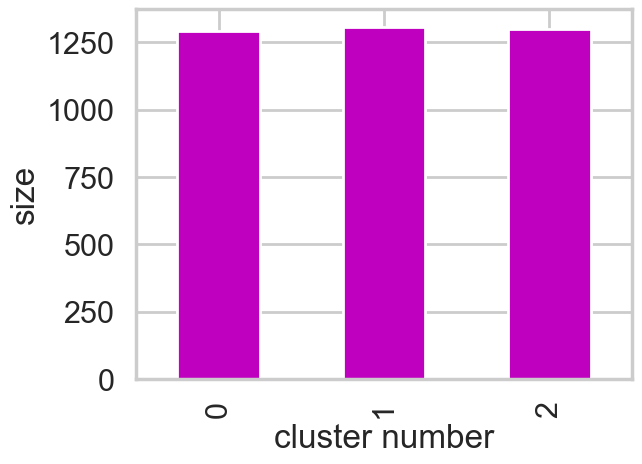

In [13]:
cluster=KMeans(n_clusters=3,random_state=2)
data['cluster']=cluster.fit_predict(data)
data.cluster.value_counts().sort_index().plot(kind='bar',color='m')
plt.xlabel('cluster number')
plt.ylabel('size')

In [14]:
from sklearn.metrics import silhouette_score
labels=clust.labels_
print(labels,len(labels))
print('Silhouette Score:\t',silhouette_score(data,labels))

[0 0 0 ... 1 1 1] 3900
Silhouette Score:	 0.5866414077410316


C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Uday\AppData\Local\Temp\ipykernel_20796\2502636563.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans.fit_predict(scaled_data)


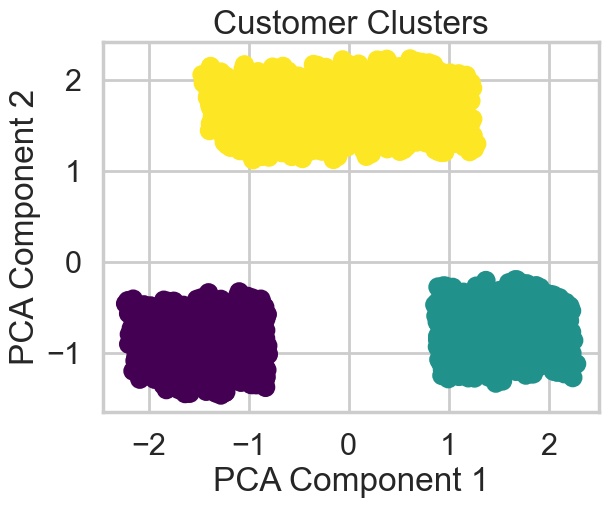

         Customer ID  Purchase Amount (USD)  Previous Purchases  \
Cluster                                                           
0        2572.299845              59.271252           27.299845   
1        2621.342727              60.176695           22.665651   
2         647.000000              59.839134           26.129157   

         Frequency of Purchases   cluster  
Cluster                                    
0                      4.701700  1.520093  
1                      1.261995  1.477532  
2                      2.986079  0.000000  


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
k = 3 
kmeans = KMeans(n_clusters=k, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_data)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Customer Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

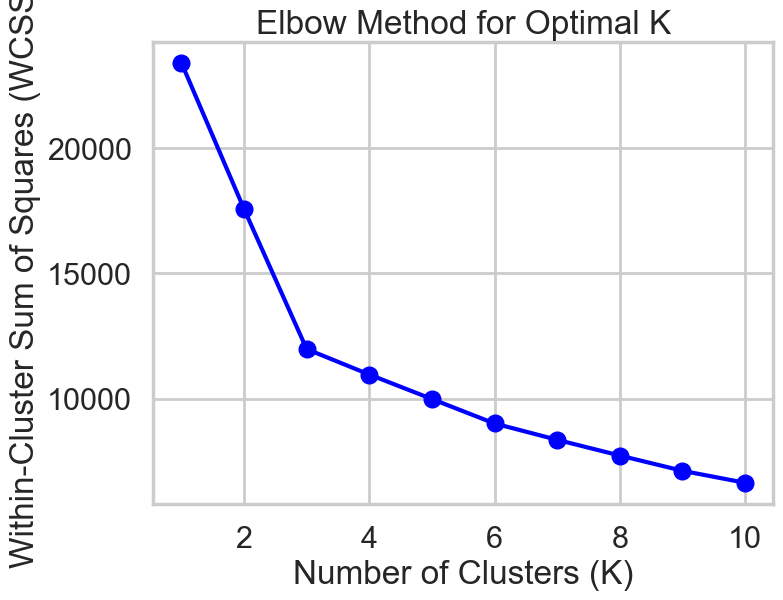

In [17]:
k_values = range(1, 11)
wcss = []  
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()